# Chess Challenge

Welcome to the chess challenge of the MQST Qiskit Fall Fest!




The queens puzzle is the problem of placing as many chess queens on an NxN chessboard so that no two queens threaten each other, and is often used as an example for various computation techniques. This problem has not an unique solution, but the complexity of the task of finding one grows exponentially as the number N grows.

#### Cell for installing the necessary packages:

In [1]:
# # Uncomment to install the necessary packages
# !pip install numpy
# !pip install scipy
# !pip install matplotlib
# !pip install jupyter
# !pip install qiskit[visualization]==1.2
# # For Local Linux or Mac, you can use the following command:
# # !pip install 'qiskit[visualization]'==1.2
# !pip install qiskit_algorithms
# !pip install qiskit_aer >= 0.14
# !pip install qiskit_ibm_runtime
# !pip install qiskit_ibm_transpiler

# 1- Starting from the basics: before queens there were rooks

To start slowly, we will solve the problem for rooks, for which is much easier to find a solution but has the disadvantage that there are many more solutions. What is the max number of rooks that can fit in a 4x4 chess board? And on a 5x5?

## The first task is to create a classical function that by brute force gives the solutions for the rooks puzzle for NxN chess board.

> Tip: Represent the chess board by an NxN array filled with 0 for the empty squares and by 1 for the squares in which a rook is placed. This representation will also help you during great part of this challenge

In [2]:
import numpy as np


def there_is_rook_attacking(solutions: np.ndarray, i: int, j: int) -> bool:
    """Returns True if there is a rook in the same line as the square (i, j).

    Args:
        solutions (np.ndarray): The solutions of the puzzle.
        i (int): The row of the square.
        j (int): The column of the square.

    Returns:
        bool: True if there is a rook in the same line as the square (i, j).
    """
    return any(solutions[compare, j] == 1 or solutions[i, compare] == 1 for compare in range(len(solutions[0])))


def classical_brute_force(N: int, there_is_piece_attacking: callable) -> np.ndarray:
    """Returns the brute force solution of the passed `there_is_piece_attacking` puzzle for NxN chess board.

    Args:
        N (int): The dimension of the chess board.
        there_is_piece_attacking (callable): A function that returns True if there is another piece attacking the square (i, j).

    Returns:
        solutions (np.ndarray): The solutions of the `there_is_piece_attacking` puzzle.
    """
    # Your code here
    solutions = np.zeros((N, N), dtype=int)

    # Set the first element randomly
    solutions[*np.random.randint(0, N, 2)] = 1

    for i in range(N):
        for j in range(N):
            if not there_is_piece_attacking(solutions, i, j):
                solutions[i, j] = 1
                break

    return solutions


# Let's test the function:
solution = classical_brute_force(8, there_is_rook_attacking)
print(solution)
print(f"\n NxN: {len(solution[0])}, Number of rooks: {np.sum(solution)}")

[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]

 NxN: 8, Number of rooks: 8


### Let's plot the time complexity of the function:

In [3]:
import time
import matplotlib.pyplot as plt


def compute_algorithm_complexity(
    start_end_step: tuple,
    brute_force_method: callable,
    there_is_pieces_attacking_method: callable,
    extend_iterable: list | None = None,
) -> tuple[list, list, list]:
    """Returns the time complexity of the passed function `f` using the arguments `args`.

    Args:
        start_end_step (tuple[int, int, int]): The start, end and step of the range of the NxN chess board to test.
        brute_force_method (callable): The function to test.
        there_is_pieces_attacking_method (callable): The function that returns True if there is another piece attacking the square (i, j).

    Returns:
        size_NxN_to_test (list): The list of the sizes of the chess board tested.
        times (list): The list of the time taken to solve the puzzle for each size.
        number_pieces (list): The list of the number of pieces on the board for each size.
    """
    # Lets time the algorithm:
    size_NxN_to_test = list(range(*start_end_step))
    if extend_iterable is not None:
        size_NxN_to_test.extend(extend_iterable)
    times = []
    number_pieces = []
    for i in size_NxN_to_test:
        time_start = time.time()
        if there_is_pieces_attacking_method is not None:
            solution = brute_force_method(i, there_is_pieces_attacking_method)
        else:
            solution = brute_force_method(i)
        number_pieces.append(np.sum(solution))
        times.append(time.time() - time_start)

    return size_NxN_to_test, times, number_pieces


def plot_algorithm_complexity(size_NxN_to_test: list[int], times: list[float], number_pieces: list[int]) -> None:
    """Plots the time complexity of the passed function `f` using the arguments `args`.

    Args:
        size_NxN_to_test (list): The list of the sizes of the chess board tested.
        times (list): The list of the time taken to solve the puzzle for each size.
        number_pieces (list): The list of the number of pieces on the board for each size.
    """
    fig, ax1 = plt.subplots()
    ax1.set_xlabel("lateral size of square N")

    color = "tab:blue"
    ax1.set_ylabel("time of computation (s)", color=color)
    ax1.plot(size_NxN_to_test, times, color=color)
    ax1.tick_params(axis="y", labelcolor=color)

    ax2 = ax1.twinx()
    color = "tab:red"
    ax2.set_ylabel("number of pieces", color=color)
    ax2.plot(size_NxN_to_test, number_pieces, color=color)
    ax2.tick_params(axis="y", labelcolor=color)

    fig.tight_layout()
    plt.show()

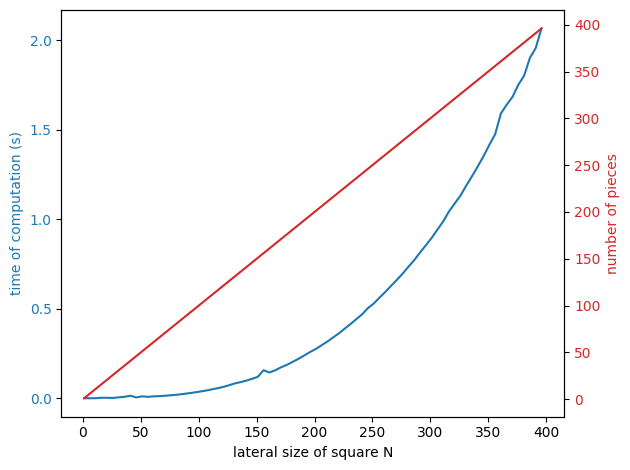

In [6]:
size_NxN, times, n_pieces = compute_algorithm_complexity((1, 400, 5), classical_brute_force, there_is_rook_attacking)
plot_algorithm_complexity(size_NxN, times, n_pieces)

## Lets randomly ordering how we iterate over each axis:

In [36]:
def generate_random_axis(N: int) -> np.ndarray:
    """Returns a random axis for the NxN chess board.

    Args:
        N (int): The dimension of the chess board.

    Returns:
        random_axis (np.ndarray): The random axis for the NxN chess board.
    """
    # Your code here
    random_axis = np.arange(N)
    np.random.shuffle(random_axis)
    return random_axis


def random_lines_brute_force(N: int, there_is_piece_attacking: callable) -> np.ndarray:
    """Returns the brute force solution of the passed `there_is_piece_attacking` puzzle for NxN chess board.

    Args:
        N (int): The dimension of the chess board.
        there_is_piece_attacking (callable): A function that returns True if there is another piece attacking the square (i, j).

    Returns:
        solutions (np.ndarray): The solutions of the `there_is_piece_attacking` puzzle.
    """
    solutions = np.zeros((N, N), dtype=int)

    for i in generate_random_axis(N):
        for j in generate_random_axis(N):
            if not there_is_piece_attacking(solutions, i, j):
                solutions[i, j] = 1
                break

    return solutions


# Let's test the function:
solution = random_lines_brute_force(8, there_is_rook_attacking)
print(solution)
print(f"\n NxN: {len(solution[0])}, Number of rooks: {np.sum(solution)}")

[[0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]]

 NxN: 8, Number of rooks: 8


### Let's plot the time complexity of the function:

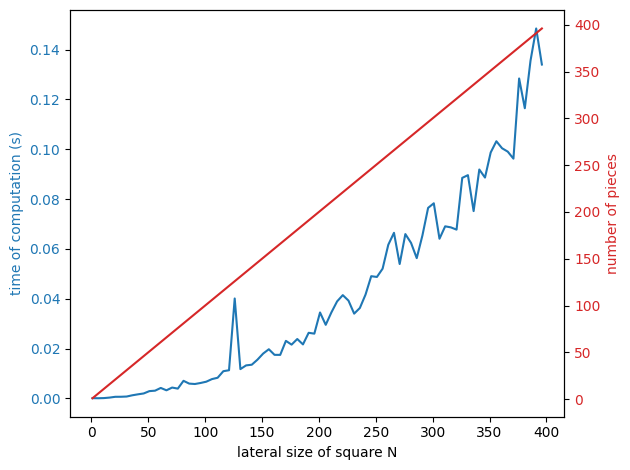

In [45]:
size_NxN, times, n_pieces = compute_algorithm_complexity((1, 400, 5), random_lines_brute_force, there_is_rook_attacking)
plot_algorithm_complexity(size_NxN, times, n_pieces)

## Now lets try, with randomly checking every square!

In [48]:
def generate_random_positions(N: int) -> np.ndarray:
    """Returns all positions in an NxN matrix in a totally random order.

    Args:
        N (int): The dimension of the chess board.

    Returns:
        random_positions (list of tuples): List of all positions in random order.
    """
    positions = [(i, j) for i in range(N) for j in range(N)]
    np.random.shuffle(positions)
    return positions


def total_random_brute_force(N: int, there_is_piece_attacking: callable) -> np.ndarray:
    """Returns the brute force solution of the passed `there_is_piece_attacking` puzzle for NxN chess board.

    Args:
        N (int): The dimension of the chess board.
        there_is_piece_attacking (callable): A function that returns True if there is another piece attacking the square (i, j).

    Returns:
        solutions (np.ndarray): The solutions of the `there_is_piece_attacking` puzzle.
    """
    solutions = np.zeros((N, N), dtype=int)

    for i, j in generate_random_positions(N):
        if not there_is_piece_attacking(solutions, i, j):
            solutions[i, j] = 1

    return solutions


# Let's test the function:
solution = total_random_brute_force(8, there_is_rook_attacking)
print(solution)
print(f"\n NxN: {len(solution[0])}, Number of rooks: {np.sum(solution)}")

[[1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]]

 NxN: 8, Number of rooks: 8


### Let's plot the time complexity of the function:

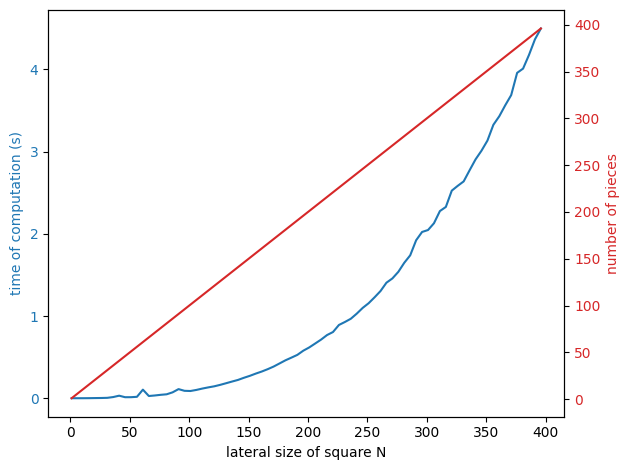

In [49]:
size_NxN, times, n_pieces = compute_algorithm_complexity((1, 400, 5), total_random_brute_force, there_is_rook_attacking)
plot_algorithm_complexity(size_NxN, times, n_pieces)

## Let's try a hardcoded (diagonal) solution:

In [110]:
def hardcoded_rooks_solution(N: int) -> np.ndarray:
    """Returns the hardcoded solution of the bishop puzzle for NxN chess board.

    Args:
        N (int): The dimension of the chess board.

    Returns:
        solutions (np.ndarray): The hardcoded solution of the bishop puzzle.
    """
    solutions = np.zeros((N, N), dtype=int)

    for i in range(N):
        solutions[i, i] = 1
    return solutions


# Let's test the function:
print("Hardcoded solution")
solution = hardcoded_rooks_solution(10)
print(solution)
print(f"NxN: {len(solution[0])}, Number of rooks: {np.sum(solution)} \n")


Hardcoded solution
[[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]
NxN: 10, Number of rooks: 10 



## Which of course, is much faster, and always gets the **$N$** solution:

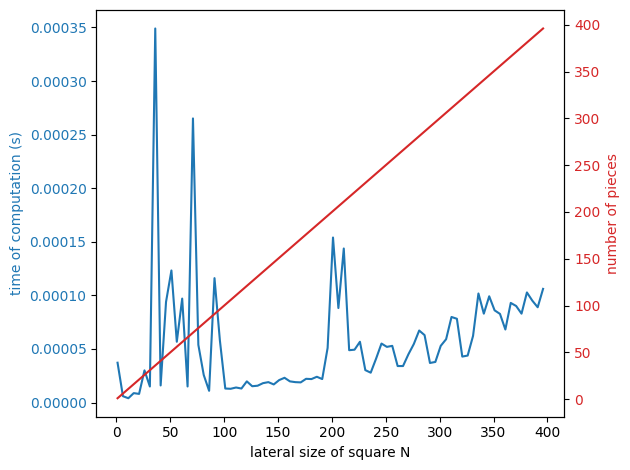

In [113]:
size_NxN, times, n_pieces = compute_algorithm_complexity((1, 400, 5), hardcoded_rooks_solution, None)
plot_algorithm_complexity(size_NxN, times, n_pieces)

Computing the available solutions by brute force is expensive and untractable when dealing with bigger boards, so we will take advantaje of the hybrid algorithm QAOA to solve this problem in a different way, phrasing the problem as a physics optimization problem, namely finding the state with lowest energy for a given hamiltonian.

The general form of a optimization problem can be written on the form of a hamiltonian:

$$H_C = \sum_{i,j} Q_{ij} X_i X_j + \sum_i b_i X_i$$

where $X_i$ are classical variables can be 1 or 0 and the coefficients $b_i$ and $Q_{ij}$ are problem dependent.

To find a solution using qubits, first we need to map the qubits form a quantum circuit to represent our problem. For that, one suggestion is to use the following mapping:
- Each qubit will represent one square of the chess board, so it will be identified by row and column indices.
- If there is a piece on that square, the spin will be on state $|1>$, and if it is empty the state will be $|0>$

<p style="text-align: center"><img src="https://i.imgur.com/ojkY5to.jpeg"></p>


> Example 3x3 board:
- q0 in state 0 -> 0,0
- q1 in state 0 -> 0,1
- q2 in state 0 -> 0,2
- q3 in state 0 -> 1,0
- q4 in state 0 -> 1,1
- q5 in state 1 -> 1,2
- q6 in state 0 -> 2,0
- q7 in state 0 -> 2,1
- q8 in state 0 -> 2,2

This is just a suitable mapping but it is not unique. There are many more mappings that can be used for this problem, so if you have any other please explain it and use it!!!

For the previous mapping we need $N^2$ qubits to find a solution for a NxN chess board, so a way to improve this mapping could be to reduce the number of qubits needed to map the problem. A new mapping will also change some of the following instructions... be carefull with that!!

To adapt the expression to our problem, we will change the single index $i$ of the classical variables to the actual chess board indices, where latin letters will be rows and greek indices will be columns. Therefore, the classical hamiltonian for our mapping is of the form:

$$H_C = \sum_{k,\alpha ,l,\beta} Q_{k \alpha,l \beta} X_{k\alpha}X_{l\beta} + \sum_{k\alpha} b_{k\alpha} X_{k\alpha}$$

Moreover, we need to define a specific hamiltonian whose groundstate is a solution of the rooks puzzle. For that, we will need two terms:
- One term that lowers the energy with the number of rooks ($|1>$ states)
> Tip: this is a one-body term
- One term that increases the energy if one rook threatens other. This penalization should be bigger than the energy gained by adding one other rook
> Tip: this is a two body interaction term

## Define the weigths $b_{k\alpha}$ and $Q_{k\alpha, l\beta}$ such that the previous cost function has as ground state the solution of the rook's puzzle. Make the cost of threatening 1.5 times the benefit of adding one extra rook (one extra $X$ with 1 value)

> Tip: Adding one more rook DECREASES energy, therefore $b<0$, and having threatened rooks should INCREASE it, therefore $Q>0$. Use $b=-1$ and $Q=1.5$ for those cases where the value is non-zero.

> Tip2: The rooks in chess only move vertical and horizontal, so the only relevant $Q$ coefficients are those for which $k=l$ or $\alpha=\beta$.

In [1]:
import itertools
import numpy as np


def classical_hamiltonian_onebody_coeff(N: int, one_body_term_coeff: float = -1.0) -> np.ndarray:
    """Returns the NxN matrix of b_{k \alpha} weigths.

    Args:
        N (int): The dimension of the chess board.

    Returns:
        b_vector (np.array): The NxN matrix of b_{k \alpha} weigths.
        hamiltonian (SparsePauliOp): The hamiltonian of the rooks puzzle.

    """
    return one_body_term_coeff * np.ones((N, N))


def generate_rooks_interactions(Q_matrix, N, two_body_term_coeff):
    # We set the two body term for each pair of rooks (divided by 2, for the repeated pairs):
    for i in range(N):
        Q_matrix[i, :, i, :] = two_body_term_coeff / 2
        Q_matrix[:, i, :, i] = two_body_term_coeff / 2

    return Q_matrix


def correct_self_interactions(Q_matrix, N):
    # And we correct the self interactions pairs:
    for i, j in itertools.product(range(N), range(N)):
        Q_matrix[i, j, i, j] = 0

    return Q_matrix


def classical_hamiltonian_rooks_twobody_coeff(N: int, two_body_term_coeff=1.5) -> np.ndarray:
    """Returns the NxNxNxN array of Q_{k \alpha, l \beta} weigths.

    Args:
        N (int): The dimension of the chess board.

    Returns:
        Q_matrix (np.array): The NxNxNxN array of Q_{k \alpha, l \beta} weigths.
    """
    Q_matrix = np.zeros((N, N, N, N))

    # We set the two body term for each pair of rooks (divided by 2, for the repeated pairs):
    Q_matrix = generate_rooks_interactions(Q_matrix, N, two_body_term_coeff)

    # And we correct the self interactions pairs:
    Q_matrix = correct_self_interactions(Q_matrix, N)

    return Q_matrix


def classical_energy_rooks(Z_matrix: np.ndarray, one_body_term_coeff=-1, two_body_term_coeff=1.5) -> float:
    """Returns the value of the hamiltonian for a given X_matrix of length NxN.

    Args:
        Z_matrix (np.array): The NxN matrix of X{k \alpha} values.


    Returns:
        energy (float): The value of the hamiltonian for the given Z_matrix.
    """
    N = Z_matrix.shape[0]

    b = classical_hamiltonian_onebody_coeff(N, one_body_term_coeff)
    Q = classical_hamiltonian_rooks_twobody_coeff(N, two_body_term_coeff)

    # Sum all the one body terms * one_body_term_coeff
    one_body_energy = np.sum(Z_matrix * b)

    # Summ all the two body terms * two_body_term_coeff (including repetition and itself):
    two_body_energy = np.einsum("ak, kabl, lb", Z_matrix, Q, Z_matrix)

    print("One body energy", one_body_energy)
    print("Two body energies", two_body_energy)

    return two_body_energy + one_body_energy


### Let's test our implementation:

In [4]:
def generate_random_board(N: int) -> np.ndarray:
    """Returns a random board of size NxN.

    Args:
        N (int): The dimension of the chess board.

    Returns:
        random_board (np.array): The random board of size NxN.
    """
    return np.random.randint(0, 2, (N, N))


N = 2
random_board = generate_random_board(N)

print(random_board)
print("\n")
print(f"Energy of the board: {classical_energy_rooks(random_board)}")


[[1 1]
 [0 0]]


One body energy -2.0
Two body energies 1.5
Energy of the board: -0.5


As our system is a quantum system where the hamiltonian is an operator, whe should write it in terms of known operators. For that, we will do the change of variable
$$X_{k\alpha} = \frac{1-\hat\sigma^z_{k\alpha}}{2}$$
where $\hat \sigma^z_{k\alpha}$ is the Pauli Z operator acting on the qubit that represents the square of row $k$ and column $\alpha$. Introducing this change of variable on the previous function, you will obtain a quantum operator of the same form with an extra constant term that can be neglected because it only changes the origin of the energy.

> Hint: For this step you might need some pen and paper calculations to find the transformation!

## Write the new hamiltonian and create the associated functions to find the new coefficients

__Write here your hamiltonian__

In [5]:
from copy import deepcopy
import itertools

from numpy import ndarray
from qiskit.quantum_info import SparsePauliOp
from scipy import sparse


# def quantum_hamiltonian_rook_onebody_coeff(N: int) -> np.ndarray:
#     """Returns the NxN matrix of b_{k \alpha} weigths.

#     Args:
#         N (int): The dimension of the chess board.

#     Returns:
#         b_vector (np.array): The NxN matrix of b_{k \alpha} weigths.
#         hamiltonian (SparsePauliOp): The hamiltonian of the rooks puzzle.

#     """
#     b = classical_hamiltonian_rook_onebody_coeff(N)
#     X_matrix = [[0, 0], [0, 1]]

#     for i, j in itertools.product(range(N), range(N)):
#         if b[i, j] != 0:
#             b[i, j] *= X_matrix
#         else:
#             b[i, j] = [[0, 0], [0, 0]]

#     return b


# def quantum_hamiltonian_rooks_twobody_coeff(N: int) -> np.ndarray:
#     """Returns the NxNxNxN array of Q_{k \alpha, l \beta} weigths.

#     Args:
#         N (int): The dimension of the chess board.

#     Returns:
#         Q_matrix (np.array): The NxNxNxN array of Q_{k \alpha, l \beta} weigths.
#     """
#     Q = classical_hamiltonian_rooks_twobody_coeff(N)
#     X_matrix = [[0, 0], [0, 1]]

#     for i, j, k, l in itertools.product(range(N), range(N), range(N), range(N)):
#         if Q[i, j, k, l] != 0:
#             Q[i, j, k, l] *= X_matrix
#         else:
#             Q[i, j, k, l] = [[0, 0], [0, 0]]

#     return Q


def translate_from_matrix_to_SparseOp(b: ndarray, Q: ndarray) -> SparsePauliOp:
    """Returns the SparsePauliOp of the rooks hamiltonian, given the one body and two body terms."""
    N = Q.shape[0]
    sparese_pauli_op_I = "I" * N * N

    if b.min() >= 0 or Q.max() <= 0:
        raise (ValueError("Body coefficients don't have the correct signs!"))

    one_body_term_coeff = b.min()
    two_body_term_coeff = Q.max()
    # Translate the 1 body term:
    sparese_pauli_list_1 = []
    for i, j in itertools.product(range(N), range(N)):
        sparese_pauli_op_one_body = deepcopy(sparese_pauli_op_I)
        if b[i][j] != 0:
            sparese_pauli_op_one_body = (
                f"{sparese_pauli_op_one_body[:(i * N) + j]}Z{sparese_pauli_op_one_body[(i * N) + j + 1:]}"
            )
            sparese_pauli_list_1.extend(
                [
                    (sparese_pauli_op_one_body, -1 * one_body_term_coeff / 2),
                    (sparese_pauli_op_I, one_body_term_coeff / 2),
                ]
            )
            # The -1, here comes from (I - Z)/2 -> from where we keep the -Z

    # Create the NxN matrix space basis:
    sparese_pauli_ops_2 = []
    matrix_list = []
    for i, j in itertools.product(range(N), range(N)):
        basis_vector = np.zeros((N, N))
        basis_vector[i, j] = 1
        matrix_list.append(basis_vector)

    # Translate the 2 body term:
    for i, matrix_1 in enumerate(matrix_list):
        for j, matrix_2 in enumerate(matrix_list):
            if np.einsum("ak, kabl, lb", matrix_1, Q, matrix_2) != 0:
                sparese_pauli_op_2Z = deepcopy(sparese_pauli_op_I)
                sparese_pauli_op_Z_1 = deepcopy(sparese_pauli_op_I)
                sparese_pauli_op_Z_2 = deepcopy(sparese_pauli_op_I)

                sparese_pauli_op_2Z = f"{sparese_pauli_op_2Z[:i]}Z{sparese_pauli_op_2Z[i + 1:]}"
                sparese_pauli_op_2Z = f"{sparese_pauli_op_2Z[:j]}Z{sparese_pauli_op_2Z[j + 1:]}"

                sparese_pauli_op_Z_1 = f"{sparese_pauli_op_Z_1[:i]}Z{sparese_pauli_op_Z_1[i + 1:]}"

                sparese_pauli_op_Z_2 = f"{sparese_pauli_op_Z_2[:j]}Z{sparese_pauli_op_Z_2[j + 1:]}"

                sparese_pauli_ops_2.extend(
                    [
                        (sparese_pauli_op_I, 1 / 4),
                        (sparese_pauli_op_2Z, 1 / 4),
                        (sparese_pauli_op_Z_1, -1 / 4),
                        (sparese_pauli_op_Z_2, -1 / 4),
                    ]
                )  # The -1, here comes from (I - Z)/2 -> from where we keep the -Z or (-Z)(-Z) = +ZZ

    sparse_pauli_list_2 = [(i, coeff * two_body_term_coeff) for i, coeff in sparese_pauli_ops_2]

    # Put both parts together and build hamiltonian:
    return SparsePauliOp.from_list(sparese_pauli_list_1 + sparse_pauli_list_2)

Now, we are able construct the hamiltonian for our problem, using the previous coefficients to create a quantum operator.

## Write a function that creates the hamiltonian of the rooks puzzle as a SparsePauliOp
> Tip: Use the previous functions to obtain the coefficients of the hamiltonian

In [6]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import EstimatorV2 as Estimator


def cost_hamiltonian_rooks(N, one_body_term_coeff=-1, two_body_term_coeff=1.5):
    """Returns the hamiltonian of the rooks puzzle as a SparsePauliOp.

    Args:
        N (int): The dimension of the chess board.

    Returns:
        hamiltonian (SparsePauliOp): The hamiltonian of the rooks puzzle.
    """
    b = classical_hamiltonian_onebody_coeff(N, one_body_term_coeff)
    Q = classical_hamiltonian_rooks_twobody_coeff(N, two_body_term_coeff)

    return translate_from_matrix_to_SparseOp(b, Q)

In [7]:
# Let's test it:
N = 2
cost_hamiltonian_rooks(N, one_body_term_coeff=-1, two_body_term_coeff=1.5)

SparsePauliOp(['ZIII', 'IIII', 'IZII', 'IIII', 'IIZI', 'IIII', 'IIIZ', 'IIII', 'IIII', 'ZZII', 'ZIII', 'IZII', 'IIII', 'ZIZI', 'ZIII', 'IIZI', 'IIII', 'ZZII', 'IZII', 'ZIII', 'IIII', 'IZIZ', 'IZII', 'IIIZ', 'IIII', 'ZIZI', 'IIZI', 'ZIII', 'IIII', 'IIZZ', 'IIZI', 'IIIZ', 'IIII', 'IZIZ', 'IIIZ', 'IZII', 'IIII', 'IIZZ', 'IIIZ', 'IIZI'],
              coeffs=[ 0.5   +0.j, -0.5   +0.j,  0.5   +0.j, -0.5   +0.j,  0.5   +0.j,
 -0.5   +0.j,  0.5   +0.j, -0.5   +0.j,  0.1875+0.j,  0.1875+0.j,
 -0.1875+0.j, -0.1875+0.j,  0.1875+0.j,  0.1875+0.j, -0.1875+0.j,
 -0.1875+0.j,  0.1875+0.j,  0.1875+0.j, -0.1875+0.j, -0.1875+0.j,
  0.1875+0.j,  0.1875+0.j, -0.1875+0.j, -0.1875+0.j,  0.1875+0.j,
  0.1875+0.j, -0.1875+0.j, -0.1875+0.j,  0.1875+0.j,  0.1875+0.j,
 -0.1875+0.j, -0.1875+0.j,  0.1875+0.j,  0.1875+0.j, -0.1875+0.j,
 -0.1875+0.j,  0.1875+0.j,  0.1875+0.j, -0.1875+0.j, -0.1875+0.j])

# 1.1 Finding solutions for the rook puzzle

Now that we have constructed the hamiltonian that encodes the solution of the problem, we just need to find the groundstate of it.
For that we will use the QAOA algorithm, where the circuit is optimized to find a groundstate of the cost function.

In the QAOA workflow, the optimal QAOA parameters are found in an iterative optimization loop, which runs a series of circuit evaluations and uses a classical optimizer to find the optimal parameters.
Check [QAOAAnsatz](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.QAOAAnsatz), and using scipy [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) function run the QAOA algorithm to find the solution of the rooks puzzle, using only two layers.

> Note: There is an example at [IBM web](https://learning.quantum.ibm.com/tutorial/quantum-approximate-optimization-algorithm) but it contains the way to run the algorithm on real hardware which up to now it is not the goal. Check it to get inspiration but run this optimization locally using AerSimulator or any other simulated backend.

> Note 2: The solution might not be unique


In [8]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_algorithms import QAOA

from scipy.optimize import minimize

from qiskit.providers import Backend
import matplotlib.pyplot as plt
import numpy as np
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import Session
from qiskit.circuit.library import QAOAAnsatz
from qiskit.providers import Backend


def cost_function_estimator(
    params: np.ndarray, hamiltonian: SparsePauliOp, estimator: Estimator, backend: Backend, objective_func_vals: list
) -> float:
    """Cost function estimator to optimize the QAOA parameters.

    Args:
        params (np.ndarray): The current parameters of the QAOA ansatz.
        hamiltonian (SparsePauliOp): The cost hamiltonian of the rooks puzzle.
        estimator (Estimator): the estimator object to be used.
        backend (Backend): The qiskit backend to run the circuits.
        objective_func_vals (list): The list to store the objective function values.

    Returns:
        float: The expected value of the cost hamiltonian given the qaoa circuit with the current parameters.
    """

    n_layers = len(params) // 2

    circuit = QAOAAnsatz(cost_operator=hamiltonian, reps=n_layers)
    circuit.measure_all()

    pass_manager = generate_preset_pass_manager(2, backend)
    isa_circuit = pass_manager.run(circuit)

    pub = (isa_circuit, hamiltonian, params)
    job = estimator.run([pub])

    results = job.result()[0]
    cost = results.data.evs

    objective_func_vals.append(cost)

    return cost


def QAOA_optimizer(
    n_layers: int, hamiltonian: SparsePauliOp, backend: Backend, method: str | None = "COBYLA", n_tries: int = 5
) -> dict:
    """Optimizes the a QAOA ansatz given a hamiltonian.

    Args:
        n_layers (int): Number of layer for the QAOA algorithm.
        hamiltonian (SparsePauliOp): The cost Hamiltonina to which we want to find the ground state.
        backend (Backend): The backend to run the circuits.
        method (str): The optimization method to use. Default is "COBYLA".
        n_tries (int): Number of tries, to do the stochasctic minimization from 0.

    Returns:
        dict: The optimization result of the QAOA ansatz.
        list: Objective function evaluation list.
    """
    init_params = np.random.rand(2 * n_layers)

    with Session(backend=backend) as session:
        estimator = Estimator(mode=session)

        # Since its very stochastic, lets try several times:

        minimum_energy: float | None = None
        for _ in range(n_tries):
            objective_func_vals = []

            result = minimize(
                cost_function_estimator,
                init_params,
                args=(hamiltonian, estimator, backend, objective_func_vals),
                method=method,
            )

            if minimum_energy is None or minimum_energy > min(objective_func_vals):
                best_result = result
                best_objective_func_vals = objective_func_vals

    return best_result, best_objective_func_vals

## Run the QAOA algorithm for 3x3 and 4x4 boards and discuss the solutions obtained.
## Compare the solutions with the ones obtained by brute force.

In [9]:
def QAOA_sample_circuit(params: np.ndarray, cost_hamiltonian: SparsePauliOp, backend: Backend) -> dict[str, int]:
    """Helper function to sample the QAOA circuit given the final optimization parameters.

    Args:
        params (np.ndarray): The parameters of the QAOA ansatz.
        cost_hamiltonian (SparsePauliOp): The cost hamiltonian.
        backend (Backend): The backend used to run the circuits.

    Returns:
        dict[str, int]: The frequency of the measurements of the QAOA circuit.
    """
    sampler = Sampler(mode=backend)
    n_layers = len(params) // 2

    circuit = QAOAAnsatz(cost_operator=cost_hamiltonian, reps=n_layers)
    circuit.measure_all()
    circuit.assign_parameters(params, inplace=True)

    pass_manager = generate_preset_pass_manager(2, backend)
    isa_circuit = pass_manager.run(circuit)

    result = sampler.run(
        [(isa_circuit,)],
        shots=1000,
    ).result()

    return result[0].data.meas.get_counts()


In [10]:
# Lets resort, with the values of the counts:
def sort_results(final_solution: dict[str, int]) -> tuple[list, dict[str, int]]:
    """Sorts the counts of the measurements.

    Args:
        counts (dict[str, int]): The counts of the measurements.

    Returns:
        dict[str, int]: The sorted counts of the measurements.
    """
    sorted_final_solution_list = sorted(final_solution.items(), key=lambda x: x[1], reverse=True)
    sorted_final_solution = dict(sorted_final_solution_list)

    return sorted_final_solution_list, sorted_final_solution


def print_chess_solutions(sorted_final_solution_list, prints_to_do=3, classical_energy=None):
    """Prints the chess board solutions of the rooks puzzle."""
    N = int(np.sqrt(len(sorted_final_solution_list[0][0])))
    solutions = []
    frequencies = []

    print(f"The {prints_to_do} most frequent results:", "\n")
    chess_board_solution = np.zeros((N, N), dtype=int)
    for i in range(prints_to_do):
        frequency = sorted_final_solution_list[i][1]
        frequencies.append(frequency)
        solutions.append(sorted_final_solution_list[i][0])

        for idx, square in enumerate(sorted_final_solution_list[i][0]):
            i, j = idx // N, idx % N
            chess_board_solution[i, j] = int(square)

        if classical_energy is not None:
            energy = classical_energy(chess_board_solution)
            print(f"{chess_board_solution} with Freq: {frequency}, E: {energy} \n")
        else:
            print(f"{chess_board_solution} with Freq: {frequency} \n")

    plt.bar(solutions, frequencies)
    plt.xlabel("Solutions")
    plt.ylabel("Frequencies")
    plt.title("Frequency of Solutions")
    plt.xticks(rotation=90)
    plt.show()


## Lets test it, for 2x2:

In [19]:
# Defining the problem:
N = 2
layers = 5
n_tries = 5
simulator = AerSimulator()
ham = cost_hamiltonian_rooks(N, one_body_term_coeff=-1, two_body_term_coeff=1.5)

# Executing the problem:
optimization_result, objective_func_vals = QAOA_optimizer(layers, ham, simulator, n_tries=n_tries)
final_solutions = QAOA_sample_circuit(optimization_result.x, ham, simulator)

[('0110', 450), ('1001', 425), ('0000', 18), ('1000', 16), ('0010', 16), ('0001', 16), ('0100', 14), ('1111', 9), ('1011', 9), ('1110', 6), ('1101', 5), ('1010', 5), ('0111', 5), ('0011', 3), ('0101', 2), ('1100', 1)] 

The 4 most frequent results: 

One body energy -2.0
Two body energies 0.0
[[0 1]
 [1 0]] with Freq: 450, E: -2.0 

One body energy -2.0
Two body energies 0.0
[[1 0]
 [0 1]] with Freq: 425, E: -2.0 

One body energy 0.0
Two body energies 0.0
[[0 0]
 [0 0]] with Freq: 18, E: 0.0 

One body energy -1.0
Two body energies 0.0
[[1 0]
 [0 0]] with Freq: 16, E: -1.0 



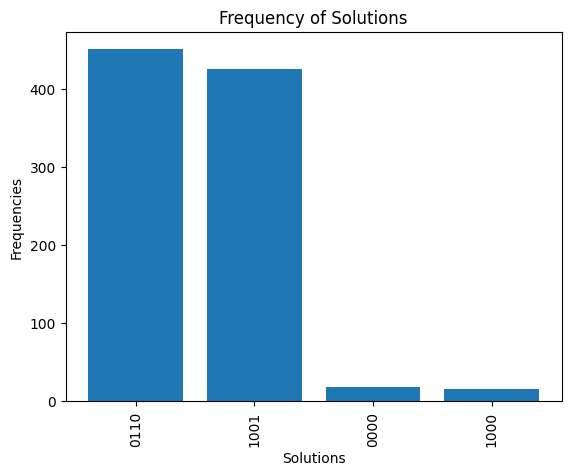

In [20]:
# Printing all the QAOA results:
sorted_final_solution_list, sorted_final_solutions = sort_results(final_solutions)
print(sorted_final_solution_list, "\n")
print_chess_solutions(sorted_final_solution_list, prints_to_do=N * 2, classical_energy=classical_energy_rooks)

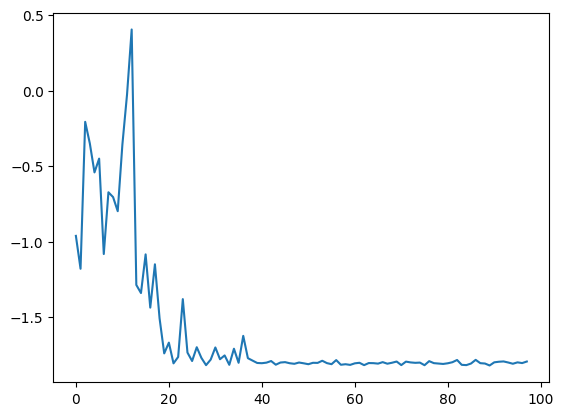

In [21]:
# Print the energy evolution:
plt.plot(objective_func_vals)

## Now for 3x3!

In [10]:
# Defining the problem:
N = 3
layers = 5
n_tries = 5
simulator = AerSimulator()
ham = cost_hamiltonian_rooks(N, one_body_term_coeff=-1, two_body_term_coeff=1.5)

# Executing the problem:
optimization_result, objective_func_vals = QAOA_optimizer(layers, ham, simulator, n_tries=n_tries)
final_solutions = QAOA_sample_circuit(optimization_result.x, ham, simulator)

[('010001100', 56), ('100010001', 54), ('001100010', 50), ('010100001', 45), ('100001010', 43), ('001010100', 40), ('000001100', 25), ('100010000', 22), ('001010000', 21), ('000100010', 20), ('010000100', 19), ('100000001', 18), ('100000010', 18), ('001100000', 17), ('010001000', 17), ('000010100', 16), ('100001000', 16), ('010000001', 15), ('010100000', 15), ('000010001', 14), ('001000010', 14), ('001000100', 13), ('000001010', 12), ('000100001', 12), ('000000100', 9), ('001010010', 9), ('001001010', 8), ('011100000', 8), ('001000110', 7), ('000000001', 7), ('001110000', 7), ('110001000', 7), ('001010001', 6), ('001000000', 6), ('010000101', 6), ('001110001', 6), ('100000000', 6), ('100100001', 6), ('000010000', 5), ('010101000', 5), ('101000010', 5), ('011000100', 5), ('000011100', 5), ('000000110', 5), ('000100011', 5), ('110000001', 5), ('000010101', 5), ('001100100', 4), ('001001000', 4), ('000000010', 4), ('100011001', 4), ('010100010', 4), ('100001001', 4), ('000101010', 4), ('1

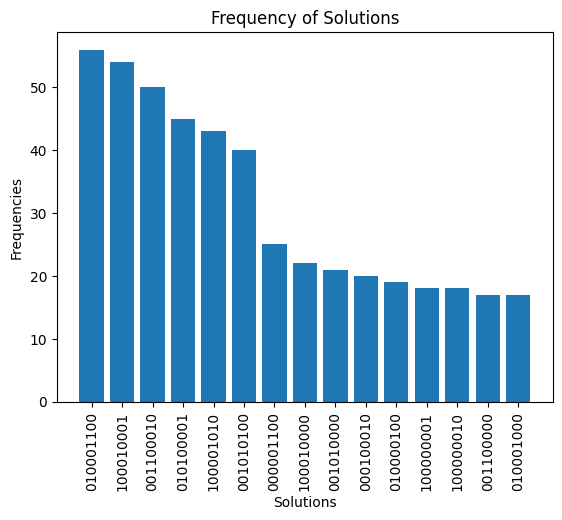

In [13]:
# Printing all the QAOA results:
sorted_final_solution_list, sorted_final_solutions = sort_results(final_solutions)
print(sorted_final_solution_list, "\n")
print_chess_solutions(sorted_final_solution_list, prints_to_do=N * 5, classical_energy=classical_energy_rooks)

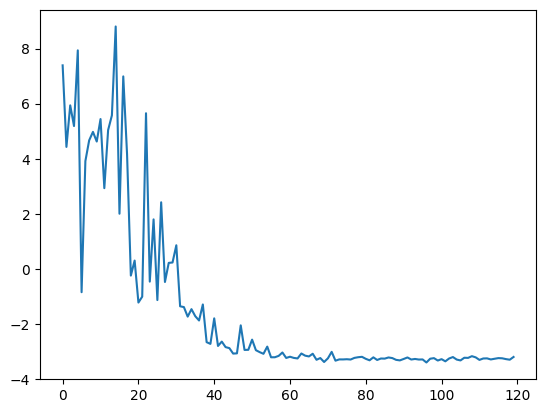

In [14]:
# Print the energy evolution:
plt.plot(objective_func_vals)

## And finally, 4x4:

In [11]:
# Defining the problem:
N = 4
layers = 5
n_tries = 10
simulator = AerSimulator()
ham = cost_hamiltonian_rooks(N, one_body_term_coeff=-2, two_body_term_coeff=1.5)

# Executing the problem:
optimization_result, objective_func_vals = QAOA_optimizer(layers, ham, simulator, n_tries=n_tries)
final_solutions = QAOA_sample_circuit(optimization_result.x, ham, simulator)

[('1000010000100001', 15), ('1000001001000001', 14), ('0100100000010010', 12), ('0001100001000010', 11), ('0100100000100001', 10), ('1000010000010010', 10), ('0010010010000001', 10), ('0010100000010100', 9), ('0010100001000001', 9), ('0010000110000100', 8), ('0001010000101000', 8), ('0001001001001000', 8), ('1000000101000010', 8), ('0100001000011000', 7), ('1000001000010100', 7), ('0001010010000010', 7), ('0100000110000010', 7), ('0100000100101000', 6), ('0001001001000000', 6), ('1000000100100100', 6), ('0001001010000100', 6), ('0100001010000001', 5), ('0100000100001000', 5), ('0001000010000010', 5), ('0000010000100001', 5), ('0010010000011000', 5), ('0010000100000100', 5), ('0100000000101000', 5), ('0001100000100000', 5), ('0000000110000010', 5), ('0100000000100001', 5), ('0100100000100000', 5), ('0010000100001000', 5), ('0100000010000010', 4), ('0001000010000100', 4), ('0000010000101000', 4), ('0000001000010100', 4), ('0000001010000100', 4), ('0100000100000010', 4), ('100000100100000

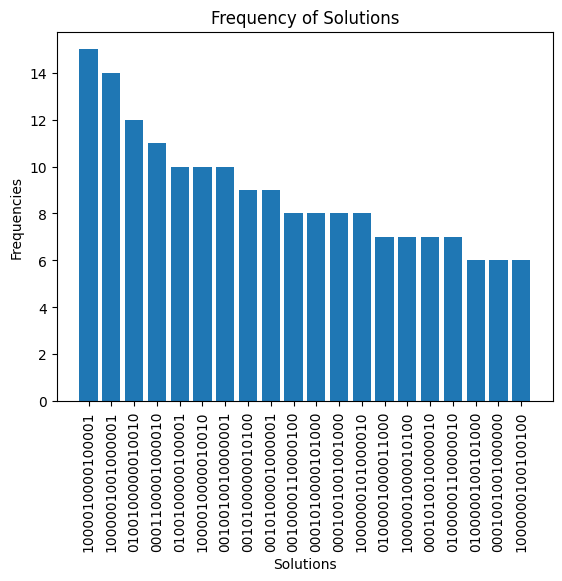

In [12]:
# Printing all the QAOA results:
sorted_final_solution_list, sorted_final_solutions = sort_results(final_solutions)
print(sorted_final_solution_list, "\n")
print_chess_solutions(sorted_final_solution_list, prints_to_do=N * 5, classical_energy=classical_energy_rooks)

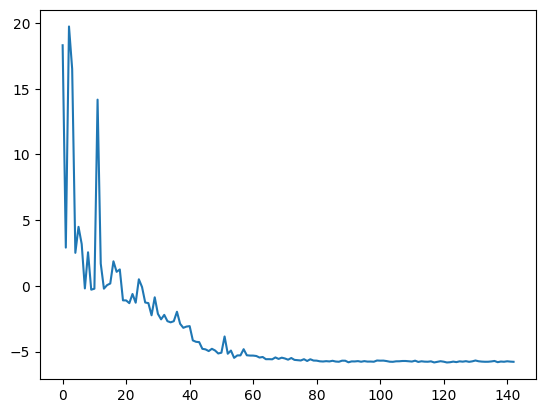

In [13]:
# Print the energy evolution:
plt.plot(objective_func_vals)

### Conclusion: Seems like it doesn't converge and remains in platoos... 

### Maybe changing the coefficients for 1 and 2 bodies, would help, since the number of interactions grows quicker with N than the number of pieces!

# 1.2 Finding a specific solution for the rook puzzle

As you might have seen before, the solution obtained using the previous hamiltonian is usually a superposition of all possible configurations of rooks on the board. To obtain a single solution, we must break the degeneracy of the solution by unbalancing the positions in which the rooks appear.

One of the simplest ways to do this is "tilting" the chess board, i.e., favoring the positioning of the rooks on one side of the board. To do this, one can add a small bias on the single-body terms of the form:

- $b_{00}$ <- $b_{00}$
- $b_{01}$ <- $b_{01}$ + $\delta$
- $b_{02}$ <- $b_{02}$ + $\sqrt{2}\delta$
- ...
- $b_{NN}$ <- $b_{NN}$ + $N\delta$

where $\delta$ should be small compared with the value of $b$ and $Q$, but not infinitely small. You might optimize this by comparing some solutions for different values of $\delta$, or maybe use your creativity to break the degeneracy using different weights and method.

## Introduce the modification on the one-body terms and run again all the steps of the algorithm to find a solution of the rook puzzle. What is the accuracy for the algorithm to find the solution?

> Extra: Can you implement this bias also for the brute force search?

In [93]:
def classical_hamiltonian_rook_onebody_coeff_tilted(N):
    """Returns the NxN matrix of b_{k \alpha} weigths for a tilted chess board.

    Args:
        N (int): The dimension of the chess board.

    Returns:
        b_vector (np.array): The NxN matrix of b_{k \alpha} weigths.
        hamiltonian (SparsePauliOp): The hamiltonian of the rooks puzzle.
    """
    # Your code here

    return b_vector


# The rest of your code here

# 1.3 Improving the optimization

Now that everything is working properly, let's improve the QAOA protocol. Test the convergence of the solution and the parameters by changing different parameters of the algorithm.

Can you find a classical optimization algorithm that converges faster than the one by default on scipy.optimize? Does it change the result on the QAOA algorithm?

Does the convergence or the final solution improve using a different mixing operator?

How does the convergence and final solution change if we increase the number of layers from 2 to 3? How does the computation time change?

In [ ]:
# Test different possibilities here

# 2- Diagonal movement

As the queens can also move in diagonal, we will carefully analyze that movement playing the same game with bishops. (Be careful, this time for a board of NxN squares there are more than N possible bishops!!!!!!!!!!)

Repeat all previous steps with the bishops puzzle, to understand how can the diagonal movement be introduced in the hamiltonian. Fill all the following steps and comment everything you do to find the solution for 3x3 and 4x4 boards:

In [57]:
# Create the brute force function to find the solutions of the bishop puzzle


def there_is_bishop_attacking(solutions: np.ndarray, i: int, j: int) -> bool:
    """Returns True if there is another bishop attacking the square (i, j).

    Args:
        solutions (np.ndarray): The current state of the board.
        i (int): The row of the square.
        j (int): The column of the square.

    Returns:
        bool: True if there is another bishop attacking the square (i, j).
    """
    N = len(solutions[0])
    return any(
        solutions[(i + compare) % N, (j + compare) % N] == 1 or solutions[(i + compare) % N, (j - compare) % N] == 1
        for compare in range(N)
    )


# Let's test the function:
print("Classical Brute Force")
solution = classical_brute_force(10, there_is_bishop_attacking)
print(solution)
print(f"NxN: {len(solution[0])}, Number of bishops: {np.sum(solution)} \n")

print("Random Line Brute Force")
solution = random_lines_brute_force(10, there_is_bishop_attacking)
print(solution)
print(f"NxN: {len(solution[0])}, Number of bishops: {np.sum(solution)} \n")

print("Total Random Brute Force")
solution = total_random_brute_force(10, there_is_bishop_attacking)
print(solution)
print(f"NxN: {len(solution[0])}, Number of bishops: {np.sum(solution)}")

Classical Brute Force
[[1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
NxN: 10, Number of bishops: 9 

Random Line Brute Force
[[0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
NxN: 10, Number of bishops: 8 

Total Random Brute Force
[[0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 1]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]]
NxN: 10, Number of bishops: 10


### Let's plot the time complexity of the functions:

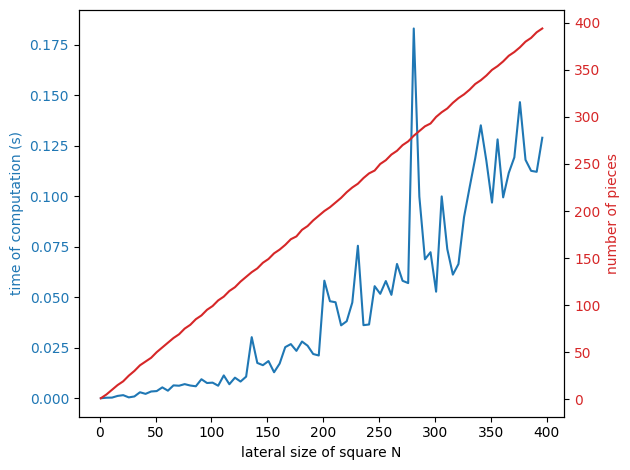

In [53]:
size_NxN, times, n_pieces = compute_algorithm_complexity((1, 400, 5), classical_brute_force, there_is_bishop_attacking)
plot_algorithm_complexity(size_NxN, times, n_pieces)

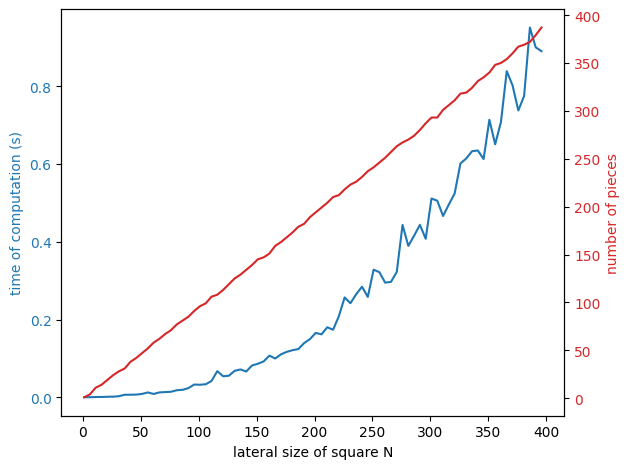

In [54]:
size_NxN, times, n_pieces = compute_algorithm_complexity(
    (1, 400, 5), random_lines_brute_force, there_is_bishop_attacking
)
plot_algorithm_complexity(size_NxN, times, n_pieces)

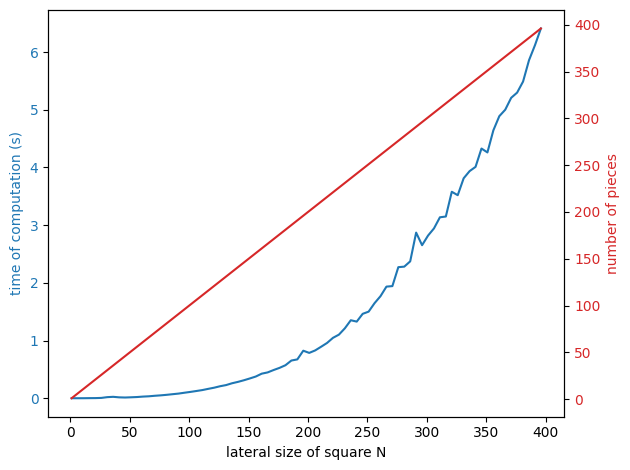

In [55]:
size_NxN, times, n_pieces = compute_algorithm_complexity(
    (1, 400, 5), total_random_brute_force, there_is_bishop_attacking
)
plot_algorithm_complexity(size_NxN, times, n_pieces)

## Let's try now, with a hardcoded (sides) solution:

In [109]:
def hardcoded_bishop_solution(N: int) -> np.ndarray:
    """Returns the hardcoded solution of the bishop puzzle for NxN chess board.

    Args:
        N (int): The dimension of the chess board.

    Returns:
        solutions (np.ndarray): The hardcoded solution of the bishop puzzle.
    """
    solutions = np.zeros((N, N), dtype=int)

    for i in range(N):
        solutions[i, 0] = 1
        solutions[i, N - 1] = 1

    solutions[0, N - 1] = 0
    solutions[N - 1, N - 1] = 0

    return solutions


# Let's test the function:
print("Hardcoded solution")
solution = hardcoded_bishop_solution(10)
print(solution)
print(f"NxN: {len(solution[0])}, Number of bishops: {np.sum(solution)} \n")

Hardcoded solution
[[1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0]]
NxN: 10, Number of bishops: 18 



### Which is much faster and always finds the **$2*(N-1)$** solution, obviously:

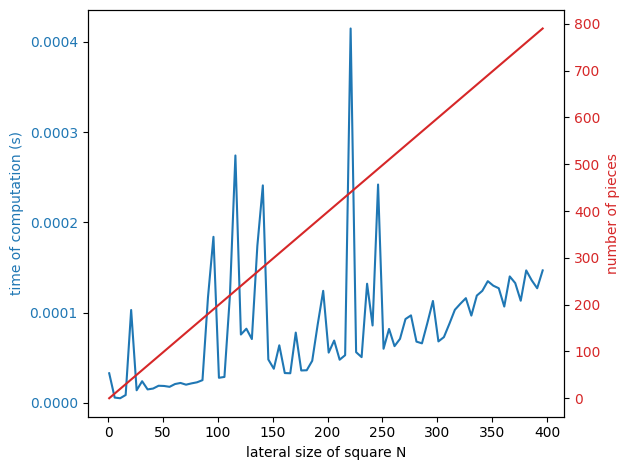

In [107]:
size_NxN, times, n_pieces = compute_algorithm_complexity((1, 400, 5), hardcoded_bishop_solution, None)
plot_algorithm_complexity(size_NxN, times, n_pieces)

In [11]:
# Create the coefficients of the classical cost function for the bishop puzzle


def generate_bishops_interactions(Q_matrix, N, two_body_term_coeff):
    # We set the two body term for each pair of bishops (divided by 2, for the repeated pairs):
    for i in range(N):
        for j in range(N):
            for k in range(N):
                i_idx_p = i + k
                i_idx_n = i - k
                j_idx_p = j + k
                j_idx_n = j - k

                if i_idx_p < N and j_idx_p < N:
                    Q_matrix[i, j, i_idx_p, j_idx_p] = two_body_term_coeff / 2
                    Q_matrix[i_idx_p, j_idx_p, i, j] = two_body_term_coeff / 2
                if i_idx_p < N and j_idx_n >= 0:
                    Q_matrix[i, j, i_idx_p, j_idx_n] = two_body_term_coeff / 2
                    Q_matrix[i_idx_p, j_idx_n, i, j] = two_body_term_coeff / 2
                if i_idx_n >= 0 and j_idx_p < N:
                    Q_matrix[i, j, i_idx_n, j_idx_p] = two_body_term_coeff / 2
                    Q_matrix[i_idx_n, j_idx_p, i, j] = two_body_term_coeff / 2
                if i_idx_n >= 0 and j_idx_n >= 0:
                    Q_matrix[i, j, i_idx_n, j_idx_n] = two_body_term_coeff / 2
                    Q_matrix[i_idx_n, j_idx_n, i, j] = two_body_term_coeff / 2

    return Q_matrix


def classical_hamiltonian_bishops_twobody_coeff(N, two_body_term_coeff):
    Q_matrix = np.zeros((N, N, N, N))

    # We set the two body term for each pair of bishops (divided by 2, for the repeated pairs):
    Q_matrix = generate_bishops_interactions(Q_matrix, N, two_body_term_coeff)

    # And we correct the self interactions pairs:
    Q_matrix = correct_self_interactions(Q_matrix, N)

    return Q_matrix


In [10]:
# Create the hamiltonian operator for the bishop puzzle, add the tilting
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import EstimatorV2 as Estimator


def cost_hamiltonian_bishops(N, one_body_term_coeff=-1, two_body_term_coeff=1.5):
    """Returns the hamiltonian of the rooks puzzle as a SparsePauliOp.

    Args:
        N (int): The dimension of the chess board.

    Returns:
        hamiltonian (SparsePauliOp): The hamiltonian of the rooks puzzle.
    """
    b = classical_hamiltonian_onebody_coeff(N, one_body_term_coeff)
    Q = classical_hamiltonian_bishops_twobody_coeff(N, two_body_term_coeff)

    return translate_from_matrix_to_SparseOp(b, Q)

### Lets try it for 2x2:

In [15]:
# Run the QAOA algorithm with the bishop puzzle to find the solutions and compare it with brute force ones:

# Defining the problem:
N = 2
layers = 5
simulator = AerSimulator()
ham = cost_hamiltonian_bishops(N, one_body_term_coeff=-1, two_body_term_coeff=2)

# Executing the problem:
optimization_result, objective_func_vals = QAOA_optimizer(layers, ham, simulator)
final_solutions = QAOA_sample_circuit(optimization_result.x, ham, simulator)

[('0101', 263), ('1010', 262), ('0011', 239), ('1100', 236)] 

The 4 most frequent results: 

[[0 1]
 [0 1]] with Freq: 263 

[[1 0]
 [1 0]] with Freq: 262 

[[0 0]
 [1 1]] with Freq: 239 

[[1 1]
 [0 0]] with Freq: 236 



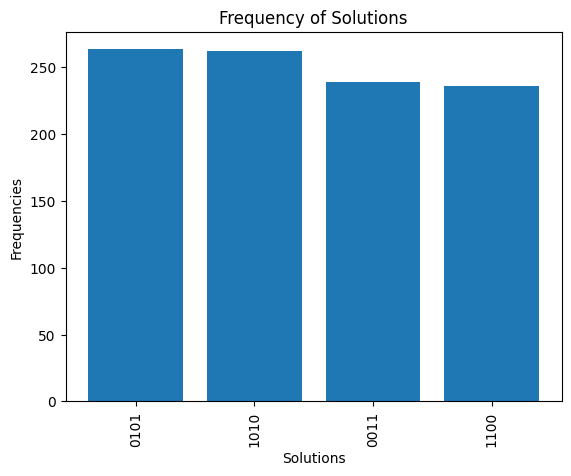

In [16]:
# Printing all the QAOA results:
sorted_final_solution_list, sorted_final_solutions = sort_results(final_solutions)
print(sorted_final_solution_list, "\n")
print_chess_solutions(sorted_final_solution_list, prints_to_do=N * 2, classical_energy=None)

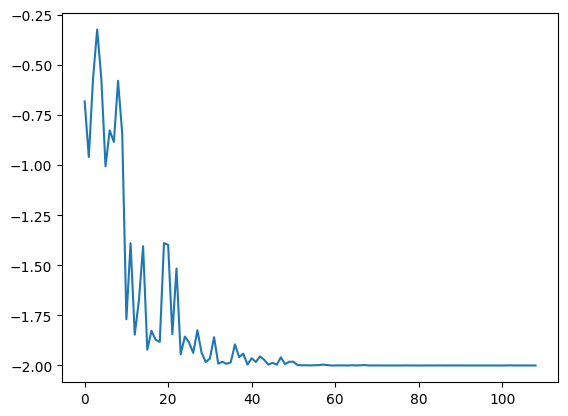

In [17]:
# Print the energy evolution:
plt.plot(objective_func_vals)

### And now for 3x3!

In [23]:
# Run the QAOA algorithm with the bishop puzzle to find the solutions and compare it with brute force ones:

# Defining the problem:
N = 3
layers = 5
simulator = AerSimulator()
ham = cost_hamiltonian_bishops(N, one_body_term_coeff=-1.5, two_body_term_coeff=2)

# Executing the problem:
optimization_result, objective_func_vals = QAOA_optimizer(layers, ham, simulator)
final_solutions = QAOA_sample_circuit(optimization_result.x, ham, simulator)

[('101101000', 52), ('100101100', 50), ('111000010', 46), ('001101001', 42), ('011000011', 42), ('110000110', 42), ('010000111', 36), ('011000010', 35), ('010000011', 33), ('000101101', 32), ('010000110', 32), ('001101000', 32), ('100101000', 31), ('000101001', 30), ('000101100', 27), ('110000010', 27), ('110010011', 18), ('111000111', 17), ('100111001', 17), ('001111100', 17), ('000111000', 17), ('010010010', 16), ('011010110', 14), ('101101101', 13), ('000101000', 11), ('011000111', 10), ('111000011', 8), ('101101001', 6), ('100101101', 6), ('110000111', 6), ('001101101', 6), ('010000010', 5), ('101000000', 5), ('111000110', 5), ('001001011', 5), ('110100110', 5), ('111100010', 4), ('010010111', 4), ('101101010', 4), ('011100001', 4), ('011000110', 4), ('100101001', 4), ('000101111', 3), ('001101100', 3), ('110001000', 3), ('001000001', 3), ('010101001', 3), ('101111000', 3), ('010111010', 3), ('000101110', 3), ('111101000', 3), ('010101101', 3), ('101101100', 3), ('111001010', 3), (

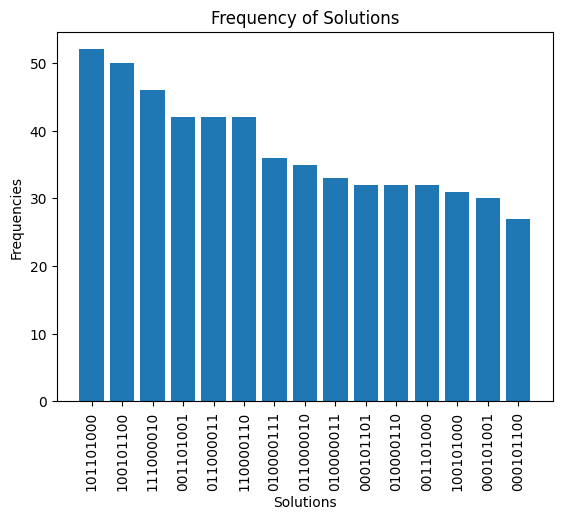

In [24]:
# Printing all the QAOA results:
sorted_final_solution_list, sorted_final_solutions = sort_results(final_solutions)
print(sorted_final_solution_list, "\n")
print_chess_solutions(sorted_final_solution_list, prints_to_do=N * 5, classical_energy=None)

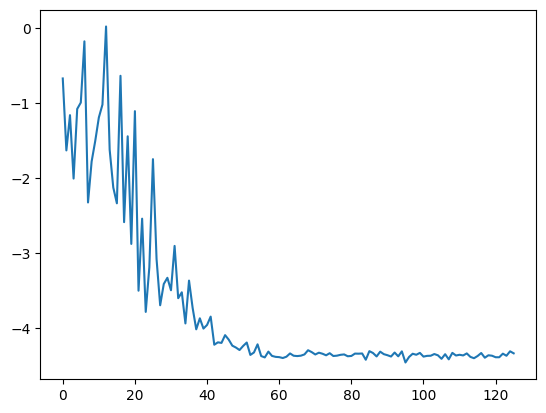

In [25]:
# Print the energy evolution:
plt.plot(objective_func_vals)

### And to finish 4x4:

In [51]:
# Run the QAOA algorithm with the bishop puzzle to find the solutions and compare it with brute force ones:

# Defining the problem:
N = 4
layers = 5
simulator = AerSimulator()
ham = cost_hamiltonian_bishops(N, one_body_term_coeff=-1.5, two_body_term_coeff=2)
n_tries = 10

# Executing the problem:
optimization_result, objective_func_vals = QAOA_optimizer(layers, ham, simulator, n_tries=n_tries)
final_solutions = QAOA_sample_circuit(optimization_result.x, ham, simulator)

[('0001100110010001', 12), ('1100000110001010', 12), ('1010100000011100', 10), ('0000100110011001', 9), ('1101000110000010', 9), ('0011100000010101', 8), ('0010100000011101', 8), ('1110000000001110', 8), ('0110000000001111', 8), ('1000100110001000', 7), ('1011100000010100', 7), ('0111000000000111', 6), ('0100000110001011', 6), ('1001100110000000', 6), ('0010100000001101', 5), ('0001000110010001', 5), ('0110000000001011', 5), ('0101000000000111', 5), ('0110000000101010', 5), ('0111000000100010', 5), ('1010100000001100', 5), ('1000100110011000', 5), ('1111000000000110', 4), ('1001100110010000', 4), ('0100010100001010', 4), ('0100010000001111', 4), ('0001110100010000', 4), ('0001100010010001', 4), ('0000100110010001', 4), ('0010100000111000', 4), ('1100000100001010', 4), ('0010000000001111', 4), ('0000110000011100', 4), ('0101000110000001', 4), ('0010100000011000', 4), ('0101000100000011', 4), ('1000000110011000', 4), ('0101000110000011', 3), ('0101010100000011', 3), ('0111000000000100', 

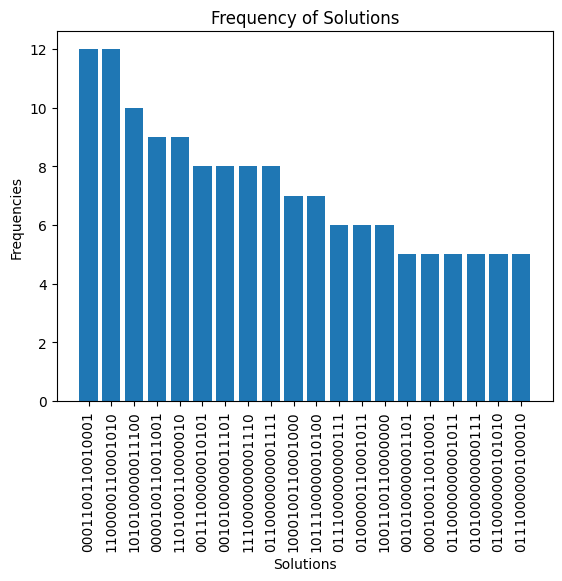

In [52]:
# Printing all the QAOA results:
sorted_final_solution_list, sorted_final_solutions = sort_results(final_solutions)
print(sorted_final_solution_list, "\n")
print_chess_solutions(sorted_final_solution_list, prints_to_do=N * 5, classical_energy=None)

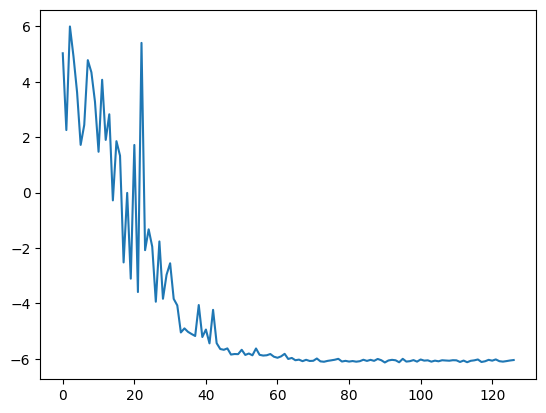

In [53]:
# Print the energy evolution:
plt.plot(objective_func_vals)

# 3- The queens puzzle

Now that we have analyzed both movements of the queens, we can put everything together and find a solution for the queens problem. For that, you only need to combine the two body interactions of the rooks with those of the bishops and voila! The queens cost hamiltonian is done!

Repeat again the previous steps to find the solution for the queens puzzle for 3x3 and 4x4 boards. You can jump some steps if you find them unnecessary, but at the end you should compare the brute force solutions with those obtained by QAOA

In [64]:
# Create the brute force function to find the solutions of the queens puzzle


def there_is_queen_attacking(solutions: np.ndarray, i: int, j: int) -> bool:
    """Returns True if there is another queen attacking the square (i, j).

    Args:
        solutions (np.ndarray): The current state of the board.
        i (int): The row of the square.
        j (int): The column of the square.

    Returns:
        bool: True if there is another queen attacking the square (i, j).
    """
    return there_is_rook_attacking(solutions, i, j) or there_is_bishop_attacking(solutions, i, j)


# Let's test the function:
print("Classical Brute Force")
solution = classical_brute_force(10, there_is_queen_attacking)
print(solution)
print(f"NxN: {len(solution[0])}, Number of queens: {np.sum(solution)} \n")

print("Random Line Brute Force")
solution = random_lines_brute_force(10, there_is_queen_attacking)
print(solution)
print(f"NxN: {len(solution[0])}, Number of queens: {np.sum(solution)} \n")

print("Total Random Brute Force")
solution = total_random_brute_force(10, there_is_queen_attacking)
print(solution)
print(f"NxN: {len(solution[0])}, Number of queens: {np.sum(solution)}")

Classical Brute Force
[[1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
NxN: 10, Number of queens: 6 

Random Line Brute Force
[[0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]]
NxN: 10, Number of queens: 8 

Total Random Brute Force
[[0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]]
NxN: 10, Number of queens: 9


## Lets plot the complexity and results of the function:

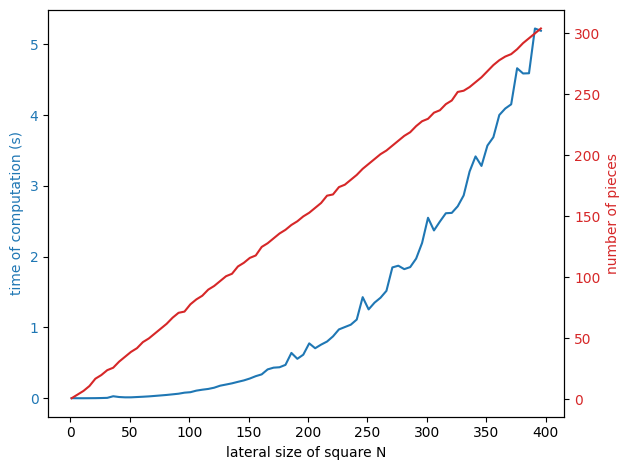

In [65]:
size_NxN, times, n_pieces = compute_algorithm_complexity((1, 400, 5), classical_brute_force, there_is_queen_attacking)
plot_algorithm_complexity(size_NxN, times, n_pieces)

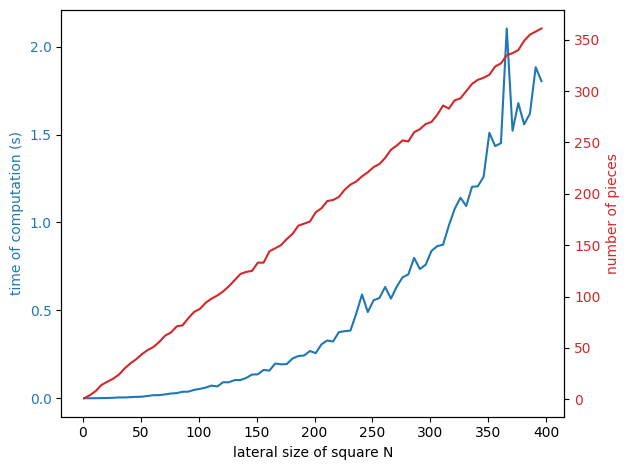

In [66]:
size_NxN, times, n_pieces = compute_algorithm_complexity(
    (1, 400, 5), random_lines_brute_force, there_is_queen_attacking
)
plot_algorithm_complexity(size_NxN, times, n_pieces)

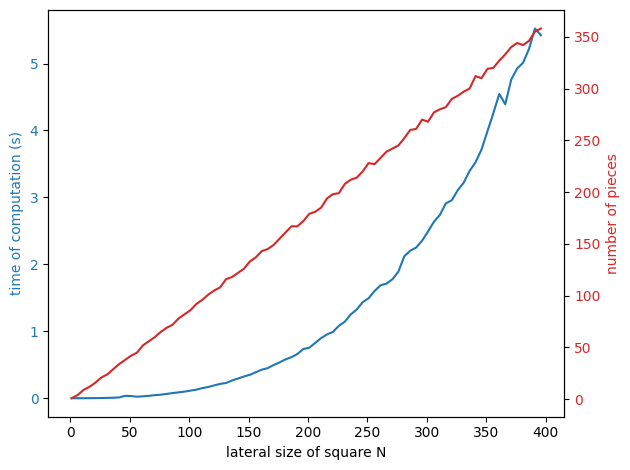

In [67]:
size_NxN, times, n_pieces = compute_algorithm_complexity(
    (1, 400, 5), total_random_brute_force, there_is_queen_attacking
)
plot_algorithm_complexity(size_NxN, times, n_pieces)

## Let's now try a truly brute force method:

In [15]:
# Python program to solve N Queen problem using backtracking

# A utility function to check if a queen can be placed on board[row][col]. Note that this function is called when "col" queens are
# already placed in columns from 0 to col -1. So we need to check only left side for attacking queens
def isSafe(N: int, board: np.ndarray, row: int, col: int) -> bool:
    """Returns True if a queen can be placed on board[row][col]

    Args:
        N (int): The dimension of the chess board.
        board (np.ndarray): The board with the queens.
        row (int): The row to check.
        col (int): The column to check.

    Returns:
        bool: True if a queen can be placed on board[row][col].
    """
    # Check this row on left side
    for i in range(col):
        if board[row][i] == 1:
            return False

    # Check upper diagonal on left side
    for i, j in zip(range(row, -1, -1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False

    # Check lower diagonal on left side
    for i, j in zip(range(row, N, 1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False

    return True


def solveNQUtil(N: int, board: np.ndarray, col: int) -> bool:
    """A recursive utility function to solve N Queen problem.

    Args:
        N (int): The dimension of the chess board.
        board (np.ndarray): The board with the queens.
        col (int): The column to check.

    Returns:
        bool: True if a queen can be placed on board[row][col].
    """
    # base case: If all queens are placed then return true
    if col >= N:
        return True

    # Consider this column and try placing this queen in all rows one by one
    for i in range(N):
        if isSafe(N, board, i, col):
            # Place this queen in board[i][col]
            board[i][col] = 1

            # recur to place rest of the queens
            if solveNQUtil(N, board, col + 1) == True:
                return True

            # If placing queen in board[i][col] doesn't lead to a solution, then queen from board[i][col]
            board[i][col] = 0

    # if the queen can not be placed in any row in this column col  then return false
    return False


# This function solves the N Queen problem using Backtracking. It mainly uses solveNQUtil() to solve the problem. It returns false if queens
# cannot be placed, otherwise return true and placement of queens in the form of 1s.
# Note that there may be more than one solutions, this function prints one  of the feasible solutions.
def solveNQ(N: int):
    """The main function to solve N Queen problem using backtracking.

    Args:
        N (int): The dimension of the chess board.

    Returns:
        board (np.ndarray): The solution of the N Queen problem.
    """
    board = np.zeros((N, N), dtype=int)

    if solveNQUtil(N, board, 0) == False:
        print("Solution does not exist")
        return False

    return board


# Test above function
# Let's test the function:
print("Hardcoded solution")
solution = solveNQ(8)
print(solution)
print(f"NxN: {len(solution[0])}, Number of queens: {np.sum(solution)} \n")

Hardcoded solution
[[1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0]]
NxN: 8, Number of queens: 8 



### Which has a time complexity, much higer of course, but always finds the **$N$** queens solution:

Solution does not exist
Solution does not exist


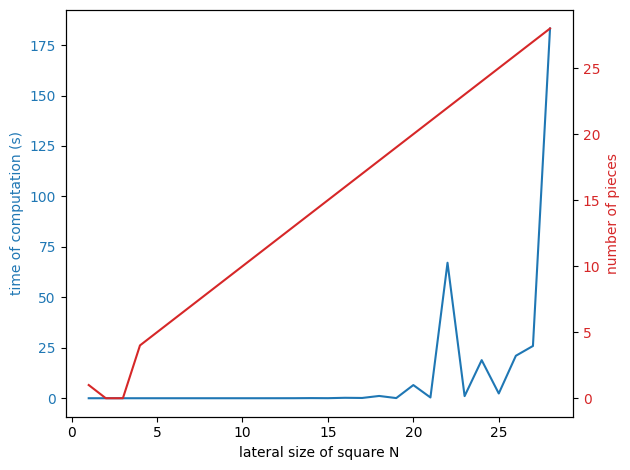

In [9]:
size_NxN, times, n_pieces = compute_algorithm_complexity((1, 30, 1), solveNQ, None)
plot_algorithm_complexity(size_NxN, times, n_pieces)

## Even a bit longer, it goes even crazier (180min!)

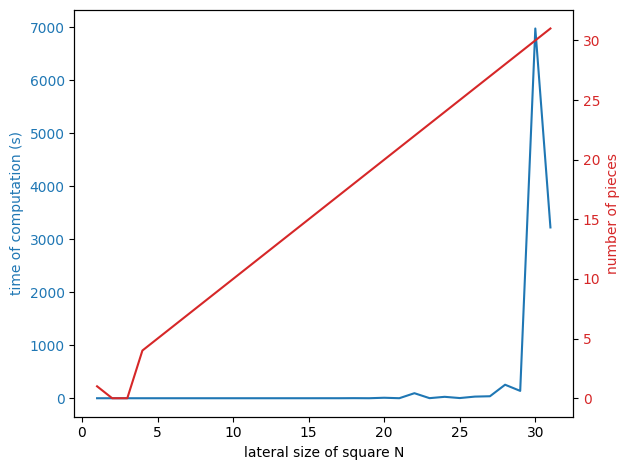

In [14]:
size_NxN, times, n_pieces = compute_algorithm_complexity((1, 32, 1), solveNQ, None)
plot_algorithm_complexity(size_NxN, times, n_pieces)

So its clear its not going to scale properly...

In [12]:
# Create the coefficients of the classical cost function for the queens puzzle


def classical_hamiltonian_queens_twobody_coeff(N, two_body_term_coeff):
    Q_matrix = np.zeros((N, N, N, N))

    # We set the two body term for each pair of rooks (divided by 2, for the repeated pairs):
    Q_matrix = generate_rooks_interactions(Q_matrix, N, two_body_term_coeff)

    # We set the two body term for each pair of bishops (divided by 2, for the repeated pairs):
    Q_matrix = generate_bishops_interactions(Q_matrix, N, two_body_term_coeff)

    # And we correct the self interactions pairs:
    Q_matrix = correct_self_interactions(Q_matrix, N)

    return Q_matrix

In [14]:
# Create the hamiltonian operator for the queens puzzle, add the tilting
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import EstimatorV2 as Estimator


def cost_hamiltonian_queens(N, one_body_term_coeff=-1, two_body_term_coeff=1.5):
    """Returns the hamiltonian of the rooks puzzle as a SparsePauliOp.

    Args:
        N (int): The dimension of the chess board.

    Returns:
        hamiltonian (SparsePauliOp): The hamiltonian of the rooks puzzle.
    """
    b = classical_hamiltonian_onebody_coeff(N, one_body_term_coeff)
    Q = classical_hamiltonian_queens_twobody_coeff(N, two_body_term_coeff)

    return translate_from_matrix_to_SparseOp(b, Q)

### Which testing it in a 2x2 again, gets us:

In [13]:
# Run the QAOA algorithm with the queens puzzle to find the solutions and compare it with brute force ones

# Defining the problem:
N = 2
layers = 5
simulator = AerSimulator()

ham = cost_hamiltonian_queens(N, one_body_term_coeff=-1, two_body_term_coeff=2)

# Executing the problem:
optimization_result, objective_func_vals = QAOA_optimizer(layers, ham, simulator)
final_solutions = QAOA_sample_circuit(optimization_result.x, ham, simulator)


[('0010', 215), ('0001', 215), ('0100', 209), ('1000', 192), ('0000', 99), ('1100', 14), ('0101', 13), ('1010', 9), ('0011', 8), ('1001', 8), ('1110', 5), ('1011', 5), ('1101', 3), ('0110', 3), ('0111', 2)] 

The 4 most frequent results: 

[[0 0]
 [1 0]] with Freq: 215 

[[0 0]
 [0 1]] with Freq: 215 

[[0 1]
 [0 0]] with Freq: 209 

[[1 0]
 [0 0]] with Freq: 192 



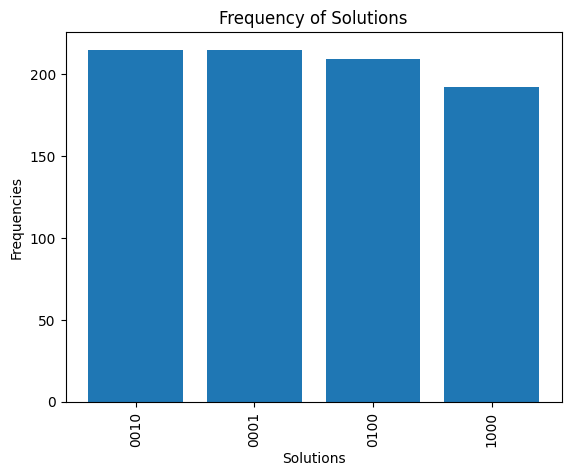

In [21]:
# Printing all the QAOA results:
sorted_final_solution_list, sorted_final_solutions = sort_results(final_solutions)
print(sorted_final_solution_list, "\n")
print_chess_solutions(sorted_final_solution_list, prints_to_do=N * 2, classical_energy=None)

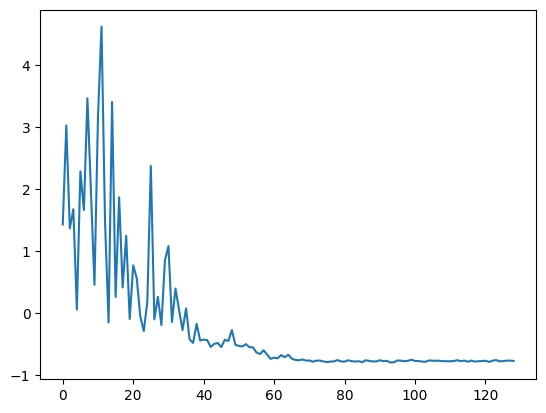

In [22]:
plt.plot(objective_func_vals)

### And finally lets test the 3x3 on queens too!

In [14]:
# Run the QAOA algorithm with the queens puzzle to find the solutions and compare it with brute force ones

# Defining the problem:
N = 3
layers = 5
simulator = AerSimulator()
n_tries = 10

ham = cost_hamiltonian_queens(N, one_body_term_coeff=-2, two_body_term_coeff=1.5)

# Executing the problem:
optimization_result, objective_func_vals = QAOA_optimizer(layers, ham, simulator, n_tries=n_tries)
final_solutions = QAOA_sample_circuit(optimization_result.x, ham, simulator)


[('100000010', 40), ('000000001', 38), ('010000001', 38), ('010000100', 37), ('010000000', 35), ('000001000', 35), ('100001000', 34), ('001000000', 32), ('000100001', 30), ('001100000', 27), ('000001100', 25), ('001000010', 24), ('100000000', 24), ('000000100', 23), ('000100000', 21), ('000101000', 18), ('000000010', 18), ('010000010', 16), ('001000100', 13), ('010100000', 11), ('100000001', 10), ('000000101', 10), ('000100010', 10), ('101000000', 10), ('100000100', 9), ('001000001', 9), ('000000000', 8), ('000100100', 8), ('000001001', 8), ('000001011', 8), ('000000011', 7), ('000011000', 7), ('001001000', 6), ('100001010', 6), ('000110110', 6), ('100010001', 6), ('100010000', 5), ('001010000', 5), ('010101010', 5), ('110000000', 5), ('010001100', 5), ('100110100', 5), ('000010010', 4), ('000010100', 4), ('011000000', 4), ('011000110', 4), ('000011100', 4), ('001101000', 4), ('001110000', 4), ('100001100', 4), ('000001010', 4), ('011011000', 4), ('101000101', 4), ('000011011', 4), ('1

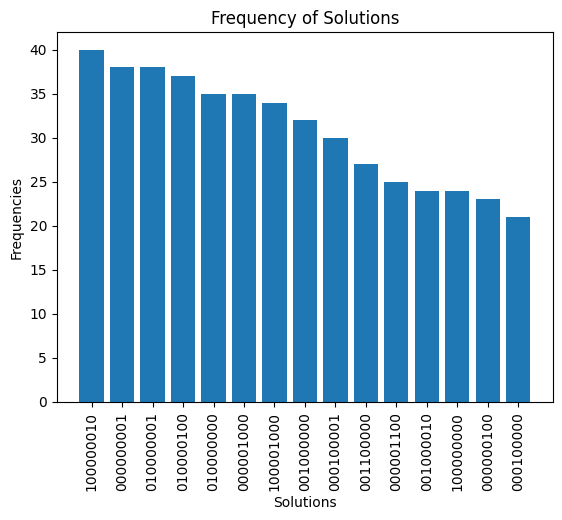

In [15]:
# Printing all the QAOA results:
sorted_final_solution_list, sorted_final_solutions = sort_results(final_solutions)
print(sorted_final_solution_list, "\n")
print_chess_solutions(sorted_final_solution_list, prints_to_do=N * 5, classical_energy=None)

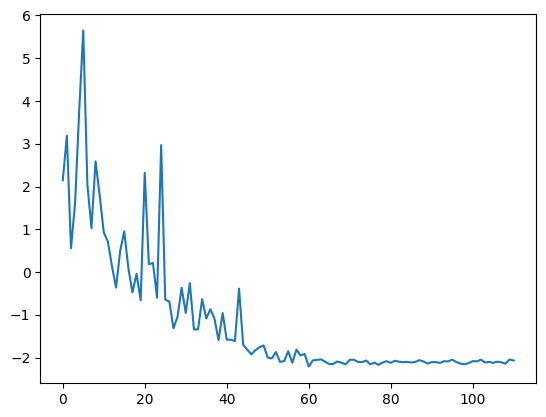

In [16]:
plt.plot(objective_func_vals)

### And to finish, lets try the 4x4 NQueens case!

In [15]:
# Run the QAOA algorithm with the queens puzzle to find the solutions and compare it with brute force ones

# Defining the problem:
N = 4
layers = 5
simulator = AerSimulator()
n_tries = 10

ham = cost_hamiltonian_queens(N, one_body_term_coeff=-2, two_body_term_coeff=1.5)

# Executing the problem:
optimization_result, objective_func_vals = QAOA_optimizer(layers, ham, simulator, n_tries=n_tries)
final_solutions = QAOA_sample_circuit(optimization_result.x, ham, simulator)


[('0010100000010100', 22), ('0001100000000100', 21), ('0100000100001000', 16), ('1000000100000010', 15), ('0100000110000010', 12), ('0001000010000010', 12), ('0100000010000001', 12), ('1000000000010100', 10), ('0000100000000001', 10), ('0010000000011000', 10), ('0010100000000001', 10), ('0000000000011000', 8), ('0100000100000010', 8), ('0000000010000001', 7), ('0001000010000000', 7), ('0001100000000000', 7), ('0001000000000010', 7), ('0010000001000001', 7), ('1000000100000000', 7), ('0000010000101000', 6), ('1000000000000100', 6), ('0000000110000000', 6), ('0100000110000000', 6), ('0100000000001000', 6), ('0010100000010000', 5), ('1000000000010000', 5), ('1000000110000010', 5), ('0000001000000001', 4), ('0010100000100100', 4), ('0000000110000010', 4), ('0100000010000010', 4), ('0010100000010001', 4), ('0010000000011100', 4), ('1000000101000000', 4), ('0000010000010000', 4), ('0010000000010100', 4), ('0001000000000100', 4), ('0000001000000000', 4), ('0010000000000001', 4), ('00000000010

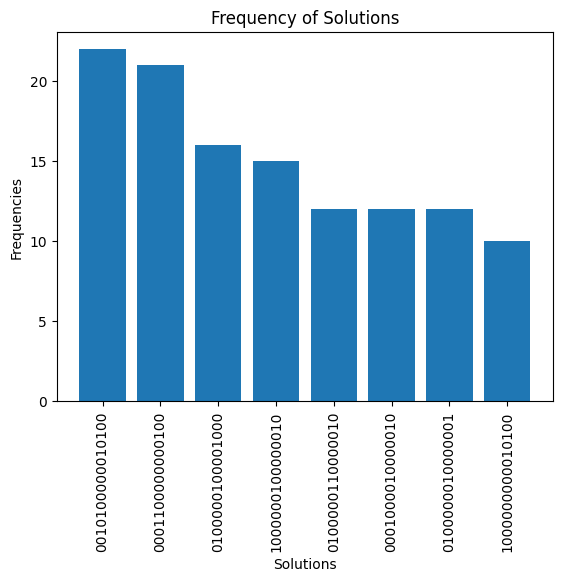

In [16]:
# Printing all the QAOA results:
sorted_final_solution_list, sorted_final_solutions = sort_results(final_solutions)
print(sorted_final_solution_list, "\n")
print_chess_solutions(sorted_final_solution_list, prints_to_do=N * 2, classical_energy=None)

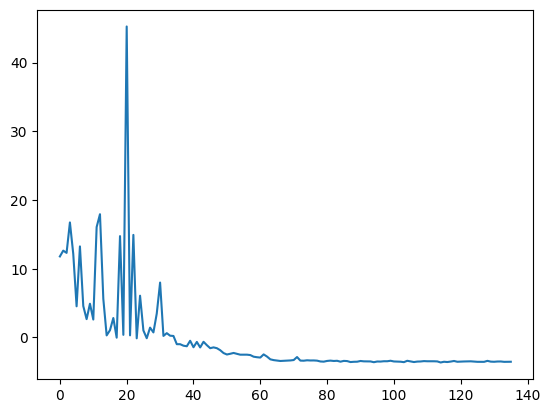

In [17]:
plt.plot(objective_func_vals)

> Note: The 2x2 and 3xx3 board solutions only has N-1 queens, while for N>4 the solution has N queens, like for example the 4x4 having 4 queens!

# 4- Going to utility-scale problems

Now that you have solved small instances of the queens puzzle you might think, what's next?? Prepare for the most difficult and exciting part of the challenge!!

The previous sections where only restricted to 3x3 and 4x4 boards because bigger circuits are much expensive to simulate using classical computers and will take a lot of time to do the optimization. Then, you might think, Is this worthy?
Yes, it is. If we run it on a quantum computer!!
Try to run 5x5 and 6x6 boards on it!.

Go again to [IBM web](https://learning.quantum.ibm.com/tutorial/quantum-approximate-optimization-algorithm) and try to run a bigger board instance in real quantum hardware.
For that you will need to register on ibm and you will have a maximum of 10 minutes of Q-computations, so be cautious. Plan everything before running it and save every result obtained to present it in the final report.

In [ ]:
# Your code here

# EXTRA 1: A farm of horses

The queens and rooks and bishops move in lines, but what about horses?

Explore the possible configurations solutions for the horses puzzle for small boards. Is this problem as easy to converge than the other instances? Which is the biggest difference?

In [ ]:
# Your code here

# EXTRA 2: A parallel story

If you are here, well done, you have already finished all the challenge but if you are still hungry I can provide you more challenging questions. You can of course decline this invitation and enjoy your well deserved rest.

Read the following works about the queens puzzle and compare what they propose with the things that we have done here:

- https://arxiv.org/html/2312.16312v1
- https://quantum-journal.org/papers/q-2019-06-03-149/

Based on those articles, which changes should be done to improve the resolution of the problem? Do you think that this will make a substantial change on your outcomes?

Can you improve the solution of the problem? Maybe propose a new mapping?

In [ ]:
# Your code here